In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, f1_score

import matplotlib.pyplot as plt
import itertools

In [2]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
labels = ['Non Violence', 'Violence']

In [4]:
df = pd.read_csv('rwf_test_pred.csv')
df

,Unnamed: 0,full_name,file_name,true_label,pred_label_orig,pred_label
0,0,443_RWF_train0.avi 0,443_RWF_train0.avi,0,[0.9497355 0.05026454],0
1,1,12_RWF_train0.avi 0,12_RWF_train0.avi,0,[0.98816484 0.01183521],0
2,2,637_RWF_train0.avi 0,637_RWF_train0.avi,0,[0.32105327 0.6789468 ],1
3,3,339_RWF_train0.avi 0,339_RWF_train0.avi,0,[0.9183778 0.0816223],0
4,4,546_RWF_train0.avi 0,546_RWF_train0.avi,0,[0.99766046 0.00233963],0
...,...,...,...,...,...,...
195,195,687_RWF_train1.avi 1,687_RWF_train1.avi,1,[0.0309114 0.9690887],1
196,196,435_RWF_train1.avi 1,435_RWF_train1.avi,1,[0.9973768 0.00262317],0
197,197,273_RWF_train1.avi 1,273_RWF_train1.avi,1,[7.1250106e-05 9.9992877e-01],1
198,198,248_RWF_train1.avi 1,248_RWF_train1.avi,1,[9.1588503e-04 9.9908423e-01],1


In [5]:
true_label = df['true_label'].tolist()
pred_label = df['pred_label'].tolist()

In [6]:
cm = confusion_matrix(true_label, pred_label)

In [18]:
precision_recall_fscore_support(true_label, pred_label)

(array([0.85849057, 0.91489362]),
 array([0.91919192, 0.85148515]),
 array([0.88780488, 0.88205128]),
 array([ 99, 101]))

In [15]:
precision_recall_fscore_support(true_label, pred_label, average='micro')

(0.885, 0.885, 0.885, None)

In [16]:
precision_recall_fscore_support(true_label, pred_label, average='macro')

(0.8866920915295062, 0.8853385338533853, 0.8849280800500313, None)

In [17]:
precision_recall_fscore_support(true_label, pred_label, average='weighted')

(0.8869741067844239, 0.885, 0.8848993120700439, None)

Confusion matrix, without normalization
[[91  8]
 [15 86]]


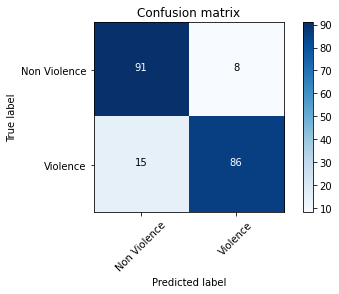

In [8]:
plot_confusion_matrix(cm, labels)

In [49]:
df2 = pd.read_csv('dataset2_test_pred.csv')
df2

,Unnamed: 0,full_name,file_name,true_label,pred_label_orig,pred_label
0,0,443_RWF_train0.avi 0,443_RWF_train0.avi,0,[0.9497355 0.05026454],0
1,1,12_RWF_train0.avi 0,12_RWF_train0.avi,0,[0.98816484 0.01183521],0
2,2,637_RWF_train0.avi 0,637_RWF_train0.avi,0,[0.32105327 0.6789468 ],1
3,3,339_RWF_train0.avi 0,339_RWF_train0.avi,0,[0.9183778 0.0816223],0
4,4,546_RWF_train0.avi 0,546_RWF_train0.avi,0,[0.99766046 0.00233963],0
...,...,...,...,...,...,...
195,195,687_RWF_train1.avi 1,687_RWF_train1.avi,1,[0.0309114 0.9690887],1
196,196,435_RWF_train1.avi 1,435_RWF_train1.avi,1,[0.9973768 0.00262317],0
197,197,273_RWF_train1.avi 1,273_RWF_train1.avi,1,[7.1250106e-05 9.9992877e-01],1
198,198,248_RWF_train1.avi 1,248_RWF_train1.avi,1,[9.1588503e-04 9.9908423e-01],1


In [51]:
cm2 = confusion_matrix(true_label2, pred_label2)

Confusion matrix, without normalization
[[91  8]
 [15 86]]


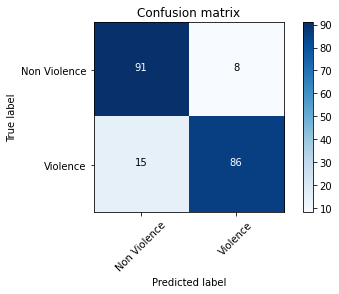

In [52]:
plot_confusion_matrix(cm2, labels)

In [12]:
df_kaggle_test = pd.read_csv('kaggle_test.csv')
df_kaggle_test

,Unnamed: 0,full_name,file_name,true_label,pred_label_orig,pred_label
0,0,651_VioKag_0.mp4 0,651_VioKag_0.mp4,0,[0.9982632 0.00173695],0
1,1,125_VioKag_0.mp4 0,125_VioKag_0.mp4,0,[9.9999624e-01 3.8088965e-06],0
2,2,733_VioKag_0.mp4 0,733_VioKag_0.mp4,0,[0.9970187 0.00298139],0
3,3,161_VioKag_0.mp4 0,161_VioKag_0.mp4,0,[0.02880068 0.97119933],1
4,4,50_VioKag_0.mp4 0,50_VioKag_0.mp4,0,[0.8405567 0.1594434],0
...,...,...,...,...,...,...
325,325,391_VioKag_1.mp4 1,391_VioKag_1.mp4,1,[0.16411194 0.83588815],1
326,326,763_VioKag_1.mp4 1,763_VioKag_1.mp4,1,[0.04074828 0.9592517 ],1
327,327,105_VioKag_1.mp4 1,105_VioKag_1.mp4,1,[0.01055076 0.9894494 ],1
328,328,151_VioKag_1.mp4 1,151_VioKag_1.mp4,1,[0.00588849 0.99411154],1


In [13]:
true_label_kaggle_test = df_kaggle_test['true_label'].tolist()
pred_label_kaggle_test = df_kaggle_test['pred_label'].tolist()

In [14]:
cm_kaggle_test = confusion_matrix(true_label_kaggle_test, pred_label_kaggle_test)

Confusion matrix, without normalization
[[150  27]
 [ 12 141]]


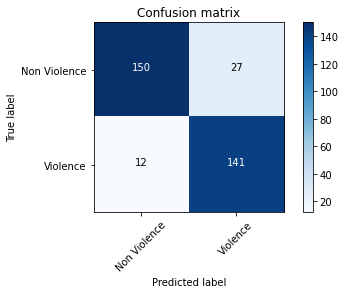

In [56]:
plot_confusion_matrix(cm_kaggle_test, labels)

# Dataset 3

In [3]:
df_dataset3_test = pd.read_csv('dataset3_test_pred.csv')
df_dataset3_test

,Unnamed: 0,full_name,file_name,true_label,pred_label_orig,pred_label
0,0,443_RWF_train0.avi 0,443_RWF_train0.avi,0,[9.9970287e-01 2.9717354e-04],0
1,1,12_RWF_train0.avi 0,12_RWF_train0.avi,0,[0.94528353 0.05471651],0
2,2,637_RWF_train0.avi 0,637_RWF_train0.avi,0,[0.3450982 0.6549019],1
3,3,339_RWF_train0.avi 0,339_RWF_train0.avi,0,[0.992487 0.00751306],0
4,4,546_RWF_train0.avi 0,546_RWF_train0.avi,0,[0.9989471 0.00105298],0
...,...,...,...,...,...,...
525,525,391_VioKag_1.mp4 1,391_VioKag_1.mp4,1,[0.00224742 0.9977526 ],1
526,526,763_VioKag_1.mp4 1,763_VioKag_1.mp4,1,[4.3956472e-05 9.9995619e-01],1
527,527,105_VioKag_1.mp4 1,105_VioKag_1.mp4,1,[6.5649465e-06 9.9999350e-01],1
528,528,151_VioKag_1.mp4 1,151_VioKag_1.mp4,1,[6.0259817e-06 9.9999410e-01],1


In [4]:
true_label_ds3 = df_dataset3_test['true_label'].tolist()
pred_label_ds3 = df_dataset3_test['pred_label'].tolist()
len(true_label_ds3)

530

In [23]:
cm_ds3 = confusion_matrix(true_label_ds3, pred_label_ds3)
cm_ds3

array([[265,  12],
       [ 15, 238]])

In [7]:
precision_recall_fscore_support(true_label_ds3, pred_label_ds3, average='macro')

(0.9492142857142857, 0.9486950814058019, 0.948924049955206, None)

Confusion matrix, without normalization
[[265  12]
 [ 15 238]]


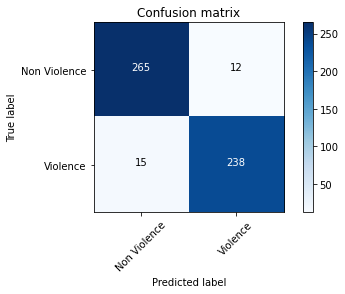

In [10]:
plot_confusion_matrix(cm_ds3, labels)

# Dataset 3 with RWF model

In [11]:
df_ds3_w_rwf_model = pd.read_csv('dataset3_test_pred_w_rwf_model.csv')
df_ds3_w_rwf_model

,Unnamed: 0,full_name,file_name,true_label,pred_label_orig,pred_label
0,0,443_RWF_train0.avi 0,443_RWF_train0.avi,0,[0.9497355 0.05026454],0
1,1,12_RWF_train0.avi 0,12_RWF_train0.avi,0,[0.98816484 0.01183521],0
2,2,637_RWF_train0.avi 0,637_RWF_train0.avi,0,[0.32105327 0.6789468 ],1
3,3,339_RWF_train0.avi 0,339_RWF_train0.avi,0,[0.9183778 0.0816223],0
4,4,546_RWF_train0.avi 0,546_RWF_train0.avi,0,[0.99766046 0.00233963],0
...,...,...,...,...,...,...
525,525,391_VioKag_1.mp4 1,391_VioKag_1.mp4,1,[0.16411194 0.83588815],1
526,526,763_VioKag_1.mp4 1,763_VioKag_1.mp4,1,[0.04074828 0.9592517 ],1
527,527,105_VioKag_1.mp4 1,105_VioKag_1.mp4,1,[0.01055076 0.9894494 ],1
528,528,151_VioKag_1.mp4 1,151_VioKag_1.mp4,1,[0.00588849 0.99411154],1


In [12]:
true_label_ds3_w_rwf_model = df_ds3_w_rwf_model['true_label'].tolist()
pred_label_ds3_w_rwf_model = df_ds3_w_rwf_model['pred_label'].tolist()
len(true_label_ds3)

530

In [19]:
cm_ds3_w_rwf_model = confusion_matrix(true_label_ds3_w_rwf_model, pred_label_ds3_w_rwf_model)
cm_ds3_w_rwf_model

array([[241,  36],
       [ 27, 226]])

In [17]:
precision_recall_fscore_support(true_label_ds3_w_rwf_model, pred_label_ds3_w_rwf_model, average='macro')

(0.8809245755953059, 0.8816583667470499, 0.881036786318696, None)

Confusion matrix, without normalization
[[241  36]
 [ 27 226]]


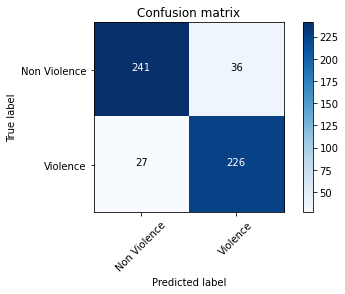

In [22]:
plot_confusion_matrix(cm_ds3_w_rwf_model, labels)

# Dataset 3 v2

In [29]:
df_ds3_v2 = pd.read_csv('dataset3_test_pred_v2.csv')
df_ds3_v2

,Unnamed: 0,full_name,file_name,true_label,pred_label_orig,pred_label
0,0,443_RWF_train0.avi 0,443_RWF_train0.avi,0,[0.96707904 0.032921 ],0
1,1,12_RWF_train0.avi 0,12_RWF_train0.avi,0,[0.8968731 0.103127 ],0
2,2,637_RWF_train0.avi 0,637_RWF_train0.avi,0,[0.35807276 0.64192724],1
3,3,339_RWF_train0.avi 0,339_RWF_train0.avi,0,[0.99721175 0.00278833],0
4,4,546_RWF_train0.avi 0,546_RWF_train0.avi,0,[9.9987912e-01 1.2099106e-04],0
...,...,...,...,...,...,...
525,525,391_VioKag_1.mp4 1,391_VioKag_1.mp4,1,[0.00905073 0.9909493 ],1
526,526,763_VioKag_1.mp4 1,763_VioKag_1.mp4,1,[6.280549e-06 9.999938e-01],1
527,527,105_VioKag_1.mp4 1,105_VioKag_1.mp4,1,[3.2022583e-06 9.9999690e-01],1
528,528,151_VioKag_1.mp4 1,151_VioKag_1.mp4,1,[5.6866505e-05 9.9994314e-01],1


In [30]:
true_label_ds3_v2 = df_ds3_v2['true_label'].tolist()
pred_label_ds3_v2 = df_ds3_v2['pred_label'].tolist()
len(true_label_ds3_v2)

530

In [31]:
cm_ds3_v2 = confusion_matrix(true_label_ds3_v2, pred_label_ds3_v2)
cm_ds3_v2

array([[266,  10],
       [ 18, 236]])

In [49]:
precision_recall_fscore_support(true_label_ds3_v2, pred_label_ds3_v2, average='macro')

(0.947984655902897, 0.9464509871048727, 0.9470000000000001, None)

In [51]:
f1_score(true_label_ds3_v2, pred_label_ds3_v2)

0.9440000000000001

Confusion matrix, without normalization
[[266  10]
 [ 18 236]]


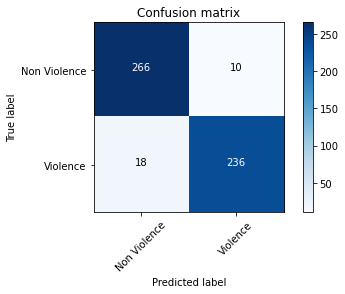

In [33]:
plot_confusion_matrix(cm_ds3_v2, labels)

# Sefl-test data with dataset3-v2 model

In [10]:
df_self = pd.read_csv('self_test_pred_v2.csv')
df_self.head

<bound method NDFrame.head of     Unnamed: 0        full_name      file_name  true_label  \
0            0  14_self_0.mp4 0  14_self_0.mp4           0   
1            1  29_self_0.mp4 0  29_self_0.mp4           0   
2            2  10_self_0.mp4 0  10_self_0.mp4           0   
3            3   4_self_0.mp4 0   4_self_0.mp4           0   
4            4  19_self_0.mp4 0  19_self_0.mp4           0   
5            5   8_self_0.mp4 0   8_self_0.mp4           0   
6            6   1_self_0.mp4 0   1_self_0.mp4           0   
7            7  26_self_0.mp4 0  26_self_0.mp4           0   
8            8  18_self_0.mp4 0  18_self_0.mp4           0   
9            9  28_self_0.mp4 0  28_self_0.mp4           0   
10          10   2_self_0.mp4 0   2_self_0.mp4           0   
11          11   9_self_0.mp4 0   9_self_0.mp4           0   
12          12  30_self_0.mp4 0  30_self_0.mp4           0   
13          13  15_self_0.mp4 0  15_self_0.mp4           0   
14          14  17_self_0.mp4 0  17_self

In [39]:
true_label_self = df_self['true_label'].tolist()
pred_label_self = df_self['pred_label'].tolist()
len(true_label_self)

59

In [40]:
cm_self = confusion_matrix(true_label_self, pred_label_self)
cm_self

array([[30,  1],
       [ 7, 21]])

Confusion matrix, without normalization
[[30  1]
 [ 7 21]]


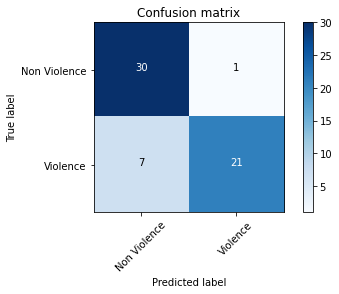

In [42]:
plot_confusion_matrix(cm_self, labels)

# Violence Test

In [5]:
df_violence = pd.read_csv('violence_test_pred_v2.csv')
df_violence

,Unnamed: 0,full_name,file_name,true_label,pred_label_orig,pred_label
0,0,317_VioTest_0.mp4 0,317_VioTest_0.mp4,0,[9.9999547e-01 4.6048208e-06],0
1,1,309_VioTest_0.mp4 0,309_VioTest_0.mp4,0,[0.95740825 0.0425918 ],0
2,2,228_VioTest_0.mp4 0,228_VioTest_0.mp4,0,[9.9999762e-01 2.4033172e-06],0
3,3,199_VioTest_0.mp4 0,199_VioTest_0.mp4,0,[0.99857694 0.00142312],0
4,4,169_VioTest_0.mp4 0,169_VioTest_0.mp4,0,[9.9954545e-01 4.5453309e-04],0
...,...,...,...,...,...,...
568,568,135_VioTest_1.mp4 1,135_VioTest_1.mp4,1,[0.00269905 0.99730104],1
569,569,112_VioTest_1.mp4 1,112_VioTest_1.mp4,1,[0.67015904 0.32984096],0
570,570,5_VioTest_1.mp4 1,5_VioTest_1.mp4,1,[0.04200997 0.95799005],1
571,571,101_VioTest_1.mp4 1,101_VioTest_1.mp4,1,[0.27359635 0.72640365],1


In [6]:
true_label_vio = df_violence['true_label'].tolist()
pred_label_vio = df_violence['pred_label'].tolist()
len(true_label_vio)

573

In [7]:
cm_vio = confusion_matrix(true_label_vio, pred_label_vio)

Confusion matrix, without normalization
[[319  44]
 [ 14 196]]


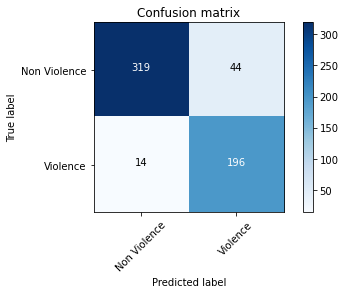

In [8]:
plot_confusion_matrix(cm_vio, labels)

In [9]:
precision_recall_fscore_support(true_label_vio, pred_label_vio, average='macro')

(0.8873123123123123, 0.906060606060606, 0.893888888888889, None)

# NTU datasets

In [4]:
df_ntu = pd.read_csv('ntu_violence_test_pred_v2.csv')
df_ntu

,Unnamed: 0,full_name,file_name,true_label,pred_label_orig,pred_label
0,0,253_VioNTU_0.mp4 0,253_VioNTU_0.mp4,0,[0.81285137 0.18714872],0
1,1,18_VioNTU_0.mp4 0,18_VioNTU_0.mp4,0,[0.99856555 0.00143448],0
2,2,65_VioNTU_0.mp4 0,65_VioNTU_0.mp4,0,[0.8527208 0.14727923],0
3,3,194_VioNTU_0.mp4 0,194_VioNTU_0.mp4,0,[0.9968397 0.00316032],0
4,4,71_VioNTU_0.mp4 0,71_VioNTU_0.mp4,0,[0.5071335 0.49286655],0
...,...,...,...,...,...,...
618,618,49_VioNTU_1.mp4 1,49_VioNTU_1.mp4,1,[0.00195339 0.99804664],1
619,619,180_VioNTU_1.mp4 1,180_VioNTU_1.mp4,1,[1.0234017e-04 9.9989772e-01],1
620,620,77_VioNTU_1.mp4 1,77_VioNTU_1.mp4,1,[0.16263144 0.8373686 ],1
621,621,266_VioNTU_1.mp4 1,266_VioNTU_1.mp4,1,[0.11356984 0.8864302 ],1


In [5]:
true_label_ntu = df_ntu['true_label'].tolist()
pred_label_ntu = df_ntu['pred_label'].tolist()
len(true_label_ntu)

623

In [6]:
cm_ntu = confusion_matrix(true_label_ntu, pred_label_ntu)

Confusion matrix, without normalization
[[234  61]
 [ 54 274]]


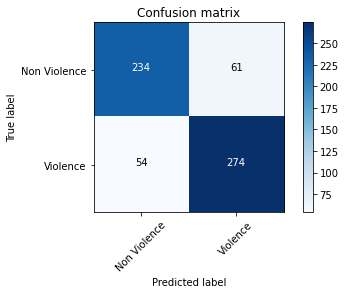

In [7]:
plot_confusion_matrix(cm_ntu, labels)

In [8]:
precision_recall_fscore_support(true_label_ntu, pred_label_ntu, average='macro')

(0.815205223880597, 0.8142930963207937, 0.8146452142012631, None)

# Github datasets

In [16]:
df_git = pd.read_csv('github_violence_test_pred_v2.csv')
df_git

,Unnamed: 0,full_name,file_name,true_label,pred_label_orig,pred_label
0,0,119_VioGit_0.mp4 0,119_VioGit_0.mp4,0,[0.981458 0.01854202],0
1,1,64_VioGit_0.mp4 0,64_VioGit_0.mp4,0,[8.791503e-04 9.991209e-01],1
2,2,5_VioGit_0.mp4 0,5_VioGit_0.mp4,0,[0.92057884 0.07942112],0
3,3,24_VioGit_0.mp4 0,24_VioGit_0.mp4,0,[0.0226584 0.97734165],1
4,4,82_VioGit_0.mp4 0,82_VioGit_0.mp4,0,[0.957425 0.042575],0
...,...,...,...,...,...,...
291,291,40_VioGit_1.mp4 1,40_VioGit_1.mp4,1,[0.27533156 0.7246685 ],1
292,292,123_VioGit_1.mp4 1,123_VioGit_1.mp4,1,[0.00245764 0.9975424 ],1
293,293,25_VioGit_1.mp4 1,25_VioGit_1.mp4,1,[0.20024294 0.79975706],1
294,294,35_VioGit_1.mp4 1,35_VioGit_1.mp4,1,[9.985197e-04 9.990015e-01],1


In [17]:
true_label_git = df_git['true_label'].tolist()
pred_label_git = df_git['pred_label'].tolist()
len(true_label_git)

296

Confusion matrix, without normalization
[[ 85  64]
 [ 10 137]]


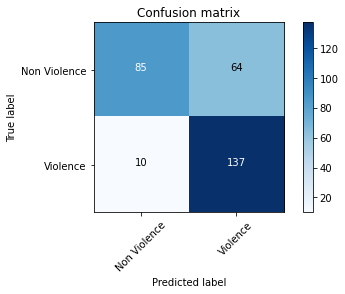

In [18]:
cm_git = confusion_matrix(true_label_git, pred_label_git)
plot_confusion_matrix(cm_git, labels)

In [19]:
precision_recall_fscore_support(true_label_git, pred_label_git, average='macro')

(0.7881644409531291, 0.7512212938866822, 0.7420388166572451, None)

# NTU_TEST

In [10]:
df_ntu_test = pd.read_csv('ntu_violence_test_pred_mdoel4.csv')
df_ntu_test.head(5)

,Unnamed: 0,full_name,file_name,true_label,pred_label_orig,pred_label
0,0,103_VioNTU_0.mp4 0,103_VioNTU_0.mp4,0,[0.657687 0.34231302],0
1,1,39_VioNTU_0.mp4 0,39_VioNTU_0.mp4,0,[0.9942181 0.00578196],0
2,2,77_VioNTU_0.mp4 0,77_VioNTU_0.mp4,0,[0.99212915 0.00787099],0
3,3,169_VioNTU_0.mp4 0,169_VioNTU_0.mp4,0,[0.6260614 0.37393862],0
4,4,281_VioNTU_0.mp4 0,281_VioNTU_0.mp4,0,[0.42545316 0.574547 ],1


In [11]:
true_label_ntu_test = df_ntu_test['true_label'].tolist()
pred_label_ntu_test = df_ntu_test['pred_label'].tolist()
len(true_label_ntu_test)

57

Confusion matrix, without normalization
[[24  3]
 [ 4 26]]


(0.8768472906403941, 0.8777777777777778, 0.8770416024653314, None)

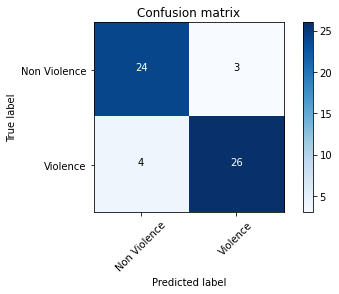

In [13]:
cm_ntu_test = confusion_matrix(true_label_ntu_test, pred_label_ntu_test)
plot_confusion_matrix(cm_ntu_test, labels)
precision_recall_fscore_support(true_label_ntu_test, pred_label_ntu_test, average='macro')

# Github dataset with model 4

In [14]:
df_git_model4 = pd.read_csv('github_violence_test_pred_mdoel4.csv')
df_git_model4.head()

,Unnamed: 0,full_name,file_name,true_label,pred_label_orig,pred_label
0,0,119_VioGit_0.mp4 0,119_VioGit_0.mp4,0,[0.9248165 0.07518356],0
1,1,64_VioGit_0.mp4 0,64_VioGit_0.mp4,0,[0.0573304 0.9426696],1
2,2,5_VioGit_0.mp4 0,5_VioGit_0.mp4,0,[0.8129601 0.18703988],0
3,3,24_VioGit_0.mp4 0,24_VioGit_0.mp4,0,[0.9451953 0.05480472],0
4,4,82_VioGit_0.mp4 0,82_VioGit_0.mp4,0,[0.76965874 0.23034132],0


In [15]:
true_label_git_model4 = df_git_model4['true_label'].tolist()
pred_label_git_model4 = df_git_model4['pred_label'].tolist()
len(true_label_ntu_test)

57

Confusion matrix, without normalization
[[ 94  55]
 [ 10 137]]


(0.8086939102564102, 0.7814226361685614, 0.775671295486609, None)

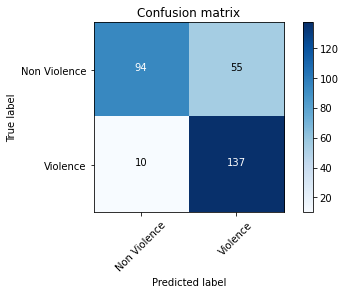

In [16]:
cm_git_model4 = confusion_matrix(true_label_git_model4, pred_label_git_model4)
plot_confusion_matrix(cm_git_model4, labels)
precision_recall_fscore_support(true_label_git_model4, pred_label_git_model4, average='macro')

# Violence test dataset (a. Tri) with model 4

In [18]:
vio_test_model_4_df = pd.read_csv('violence_test_tri_pred_mdoel4.csv')
vio_test_model_4_df

,Unnamed: 0,full_name,file_name,true_label,pred_label_orig,pred_label
0,0,317_VioTest_0.mp4 0,317_VioTest_0.mp4,0,[9.9979496e-01 2.0509788e-04],0
1,1,309_VioTest_0.mp4 0,309_VioTest_0.mp4,0,[0.96531665 0.03468335],0
2,2,228_VioTest_0.mp4 0,228_VioTest_0.mp4,0,[9.9965608e-01 3.4393126e-04],0
3,3,199_VioTest_0.mp4 0,199_VioTest_0.mp4,0,[0.95499116 0.04500891],0
4,4,169_VioTest_0.mp4 0,169_VioTest_0.mp4,0,[0.9922756 0.00772446],0
...,...,...,...,...,...,...
568,568,135_VioTest_1.mp4 1,135_VioTest_1.mp4,1,[1.4238474e-04 9.9985766e-01],1
569,569,112_VioTest_1.mp4 1,112_VioTest_1.mp4,1,[0.9241918 0.07580827],0
570,570,5_VioTest_1.mp4 1,5_VioTest_1.mp4,1,[0.05764918 0.94235086],1
571,571,101_VioTest_1.mp4 1,101_VioTest_1.mp4,1,[0.18198663 0.8180134 ],1


In [19]:
true_label_vio_test_model4 = vio_test_model_4_df['true_label'].tolist()
pred_label_vio_test_model4 = vio_test_model_4_df['pred_label'].tolist()
len(true_label_vio_test_model4)

573

Confusion matrix, without normalization
[[312  51]
 [ 29 181]]


(0.8475642127616543, 0.8607044470680835, 0.8526840806252571, None)

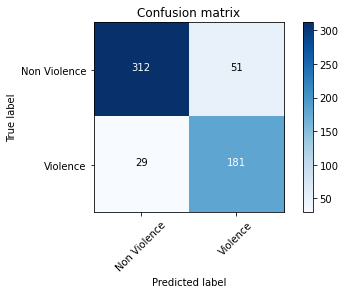

In [20]:
cm_vio_test_model4 = confusion_matrix(true_label_vio_test_model4, pred_label_vio_test_model4)
plot_confusion_matrix(cm_vio_test_model4, labels)
precision_recall_fscore_support(true_label_vio_test_model4, pred_label_vio_test_model4, average='macro')

# Dataset_3 test with model 4

In [21]:
dataset3_test_model4_df = pd.read_csv('dataset3_test_pred_model4.csv')
dataset3_test_model4_df

,Unnamed: 0,full_name,file_name,true_label,pred_label_orig,pred_label
0,0,443_RWF_train0.avi 0,443_RWF_train0.avi,0,[0.71320605 0.28679392],0
1,1,12_RWF_train0.avi 0,12_RWF_train0.avi,0,[0.9349007 0.0650993],0
2,2,637_RWF_train0.avi 0,637_RWF_train0.avi,0,[0.75167656 0.2483235 ],0
3,3,339_RWF_train0.avi 0,339_RWF_train0.avi,0,[0.4439725 0.5560276],1
4,4,546_RWF_train0.avi 0,546_RWF_train0.avi,0,[0.8993201 0.10067993],0
...,...,...,...,...,...,...
525,525,391_VioKag_1.mp4 1,391_VioKag_1.mp4,1,[0.05103603 0.94896406],1
526,526,763_VioKag_1.mp4 1,763_VioKag_1.mp4,1,[5.3888303e-04 9.9946117e-01],1
527,527,105_VioKag_1.mp4 1,105_VioKag_1.mp4,1,[0.005426 0.99457407],1
528,528,151_VioKag_1.mp4 1,151_VioKag_1.mp4,1,[0.17237942 0.8276207 ],1


In [22]:
true_label_ds3_test_model4 = dataset3_test_model4_df['true_label'].tolist()
pred_label_ds3_test_model4 = dataset3_test_model4_df['pred_label'].tolist()
len(true_label_ds3_test_model4)

530

Confusion matrix, without normalization
[[260  16]
 [ 27 227]]


(0.9200398617742791, 0.9178648864544106, 0.9185521655689017, None)

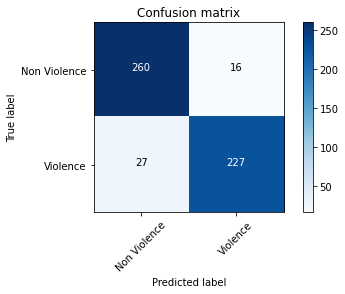

In [23]:
cm_ds3_test_model4 = confusion_matrix(true_label_ds3_test_model4, pred_label_ds3_test_model4)
plot_confusion_matrix(cm_ds3_test_model4, labels)
precision_recall_fscore_support(true_label_ds3_test_model4, pred_label_ds3_test_model4, average='macro')

# Dataset_5 test with model 5

In [26]:
dataset5_test_model5_df = pd.read_csv('dataset5_test_pred_model5.csv')
dataset5_test_model5_df

,Unnamed: 0,full_name,file_name,true_label,pred_label_score,pred_label
0,0,75_VioNTU_0.mp4 0,75_VioNTU_0.mp4,0,[0.9977975 0.00220246],0
1,1,81_VioNTU_0.mp4 0,81_VioNTU_0.mp4,0,[0.88512105 0.11487897],0
2,2,17_VioNTU_0.mp4 0,17_VioNTU_0.mp4,0,[0.9984032 0.00159686],0
3,3,204_VioNTU_0.mp4 0,204_VioNTU_0.mp4,0,[0.9856846 0.01431554],0
4,4,66_VioNTU_0.mp4 0,66_VioNTU_0.mp4,0,[0.94281125 0.0571888 ],0
...,...,...,...,...,...,...
543,543,390_Kag_1.mp4 1,390_Kag_1.mp4,1,[0.08610115 0.9138989 ],1
544,544,190_Kag_1.mp4 1,190_Kag_1.mp4,1,[2.8179009e-05 9.9997187e-01],1
545,545,113_Kag_1.mp4 1,113_Kag_1.mp4,1,[0.00301286 0.9969872 ],1
546,546,23_Kag_1.mp4 1,23_Kag_1.mp4,1,[0.00680486 0.9931953 ],1


In [27]:
true_label_ds5_test_model5 = dataset5_test_model5_df['true_label'].tolist()
pred_label_ds5_test_model5 = dataset5_test_model5_df['pred_label'].tolist()
len(true_label_ds5_test_model5)

548

Confusion matrix, without normalization
[[256  16]
 [ 21 255]]


(0.9325735676129325, 0.9325447570332481, 0.9324815269910725, None)

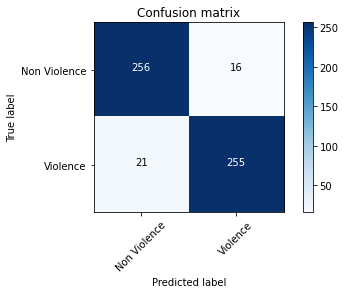

In [28]:
cm_ds5_test_model5 = confusion_matrix(true_label_ds5_test_model5, pred_label_ds5_test_model5)
plot_confusion_matrix(cm_ds5_test_model5, labels)
precision_recall_fscore_support(true_label_ds5_test_model5, pred_label_ds5_test_model5, average='macro')

# Private test with model 5

In [29]:
private_test_model5_df = pd.read_csv('private_test_pred_model5.csv')
private_test_model5_df

,Unnamed: 0,full_name,file_name,true_label,pred_label_score,pred_label
0,0,131_Test_0.mp4 0,131_Test_0.mp4,0,[0.9516083 0.04839181],0
1,1,60_Test_0.mp4 0,60_Test_0.mp4,0,[0.75653005 0.24347001],0
2,2,155_Test_0.mp4 0,155_Test_0.mp4,0,[9.999746e-01 2.547617e-05],0
3,3,29_Test_0.mp4 0,29_Test_0.mp4,0,[0.6470407 0.35295933],0
4,4,135_Test_0.mp4 0,135_Test_0.mp4,0,[9.999919e-01 8.140355e-06],0
...,...,...,...,...,...,...
413,413,114_Test_1.mp4 1,114_Test_1.mp4,1,[0.00800967 0.9919904 ],1
414,414,17_Test_1.mp4 1,17_Test_1.mp4,1,[0.39050147 0.60949856],1
415,415,69_Test_1.mp4 1,69_Test_1.mp4,1,[0.04990226 0.95009786],1
416,416,130_Test_1.mp4 1,130_Test_1.mp4,1,[0.04092239 0.95907766],1


In [30]:
true_label_private_test_model5 = private_test_model5_df['true_label'].tolist()
pred_label_private_test_model5 = private_test_model5_df['pred_label'].tolist()
len(true_label_private_test_model5)

418

Confusion matrix, without normalization
[[262   9]
 [  8 139]]


(0.9547797797797797, 0.9561839495945981, 0.9554747955763024, None)

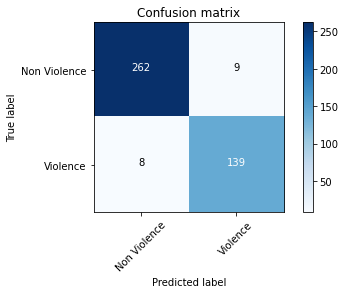

In [31]:
cm_private_test_model5 = confusion_matrix(true_label_private_test_model5, pred_label_private_test_model5)
plot_confusion_matrix(cm_private_test_model5, labels)
precision_recall_fscore_support(true_label_private_test_model5, pred_label_private_test_model5, average='macro')

# Github dataset with model 5

In [32]:
github_test_model5_df = pd.read_csv('github_pred_model5.csv')
github_test_model5_df

,Unnamed: 0,full_name,file_name,true_label,pred_label_score,pred_label
0,0,119_VioGit_0.mp4 0,119_VioGit_0.mp4,0,[0.9921495 0.00785066],0
1,1,64_VioGit_0.mp4 0,64_VioGit_0.mp4,0,[0.14499445 0.8550055 ],1
2,2,5_VioGit_0.mp4 0,5_VioGit_0.mp4,0,[0.99705875 0.00294132],0
3,3,24_VioGit_0.mp4 0,24_VioGit_0.mp4,0,[0.29311273 0.70688736],1
4,4,82_VioGit_0.mp4 0,82_VioGit_0.mp4,0,[0.82513356 0.1748665 ],0
...,...,...,...,...,...,...
291,291,40_VioGit_1.mp4 1,40_VioGit_1.mp4,1,[0.1239536 0.87604654],1
292,292,123_VioGit_1.mp4 1,123_VioGit_1.mp4,1,[0.02386612 0.9761339 ],1
293,293,25_VioGit_1.mp4 1,25_VioGit_1.mp4,1,[0.48853385 0.51146626],1
294,294,35_VioGit_1.mp4 1,35_VioGit_1.mp4,1,[4.169314e-06 9.999958e-01],1


In [34]:
true_label_github_test_model5 = github_test_model5_df['true_label'].tolist()
pred_label_github_test_model5 = github_test_model5_df['pred_label'].tolist()
len(true_label_github_test_model5)

296

Confusion matrix, without normalization
[[111  38]
 [  8 139]]


(0.8590419218534872, 0.8452723371227686, 0.8431914501566244, None)

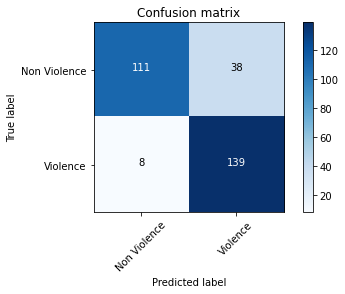

In [35]:
cm_private_test_model5 = confusion_matrix(true_label_github_test_model5, pred_label_github_test_model5)
plot_confusion_matrix(cm_private_test_model5, labels)
precision_recall_fscore_support(true_label_github_test_model5, pred_label_github_test_model5, average='macro')